In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
limit = 10
step = 0.001
color = 'r'
increase_high = False
change_func = {-limit: 'inc'}
func_line = '-'

In [3]:
def switch_color():
    global color
    if color == 'r':
        color = 'b'
    else:
        color = 'r'
    return color

def switch_line():
    global func_line
    if func_line == '-':
        func_line = '-.'
    else:
        func_line = '-'

In [4]:
x = np.arange(-limit, limit, step)
a, b, c, d, e, = -12, -18, 5, 10, -30

In [5]:
def f(x):
    func = a * x ** 4 * np.sin(np.cos(x)) + b * x ** 3 + c * x ** 2 + d * x + e
    return func

In [6]:
y_min = min(np.round(f(x), 2))
x_min = 0
f_min = f(-limit)

In [7]:
for x_cur in x:
    if f(x_cur) < f_min:
        f_min = np.round(f(x_cur), 2)
        x_min = np.round(x_cur, 2)

In [8]:
for i in range(len(x) - 1):
    if (f(x[i]) > 0 and f(x[i + 1]) < 0) or (f(x[i]) < 0 and f(x[i + 1]) > 0):
        change_func[x[i]] = 'zero'
    if increase_high:
        if f(x[i]) < f(x[i + 1]):
            increase_high = False
            change_func[x[i]] = 'inc'
    else:
        if f(x[i]) > f(x[i + 1]):
            increase_high = True
            change_func[x[i]] = 'inc'

In [9]:
change_func[limit] = 'inc'
x_list = [key for key in change_func]

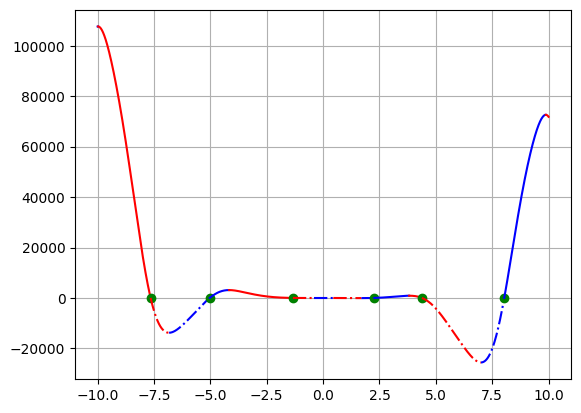

In [10]:
for i in range(len(x_list) - 1):
    x_cur = np.arange(x_list[i], x_list[i + 1], step)
    if change_func.get(x_list[i]) == 'zero':
        plt.plot(x_list[i], f(x_list[i]), 'go')
        switch_line()
    elif change_func.get(x_list[i]) == 'inc':
        switch_color()
    plt.rcParams['lines.linestyle'] = func_line
    plt.plot(x_cur, f(x_cur), color)
    plt.grid(100)